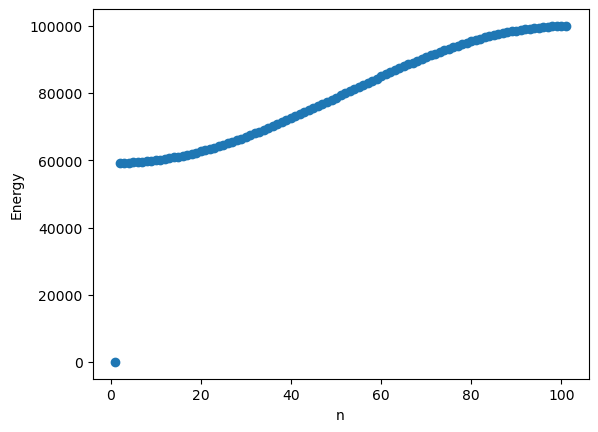

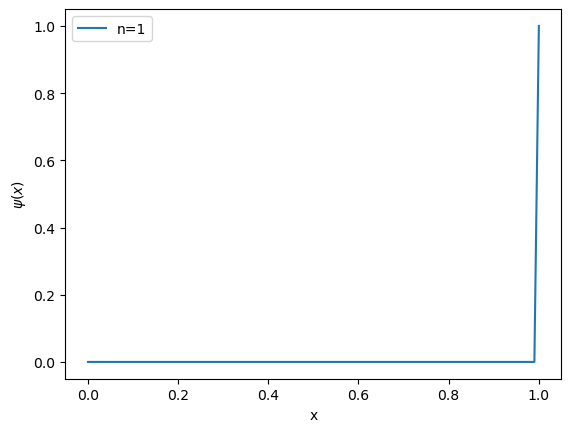

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class ParticleInABox:
    def __init__(self, well_width, total_width, barrier_height, n):
        self.well_width = well_width
        self.total_width = total_width
        self.barrier_height = barrier_height
        self.n = n
        
        self.dx = (total_width-well_width)/(n+1)
        self.x = np.linspace(well_width, total_width, n+2)
        self.V_vec = np.piecewise(self.x, [self.x<=well_width, (self.x>well_width) & (self.x<total_width), self.x>=total_width], [0, lambda x: V, np.inf])
        self.H = np.zeros((n+2, n+2))
        for i in range(1, n+1):
            self.H[i, i] = -2/(self.dx**2) + self.V_vec[i]
            self.H[i, i-1] = 1/(self.dx**2)
            self.H[i, i+1] = 1/(self.dx**2)
        self.E, self.psi = np.linalg.eigh(self.H)
    
    def plot_wavefunction(self, index):
        plt.plot(self.x, self.psi[:, index], label=f"n={index}")
        plt.xlabel("x")
        plt.ylabel("$\psi(x)$")
        plt.legend()
    
    def plot_energy_eigenvalues(self):
        plt.plot(range(1, self.n+2), self.E[1:self.n+2], 'o')
        plt.xlabel("n")
        plt.ylabel("Energy")
        
    def calculate_energy_gap(self, n1, n2):
        return self.E[n2] - self.E[n1]
    
    def calculate_wavefunction_probability(self, index):
        return self.psi[:, index]**2
        
if __name__ == '__main__':
    well_width = 0
    total_width = 1
    barrier_height = 100000
    n = 100
    
    pib = ParticleInABox(well_width, total_width, barrier_height, n)
    pib.plot_energy_eigenvalues()
    plt.show()
    
    
    pib.plot_wavefunction(1)
    plt.show()